In [1]:
import tensorflow as tf

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM,Embedding,TextVectorization
from tensorflow.keras.models import Model

In [4]:
# Unfortunately this URL doesn't work directly with pd.read_csv
!wget -nc https://lazyprogrammer.me/course_files/spam.csv

--2025-02-27 10:18:01--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.04s   

2025-02-27 10:18:01 (10.9 MB/s) - ‘spam.csv’ saved [503663/503663]



In [5]:
!head spam.csv

v1,v2,,,
ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",,,
ham,Ok lar... Joking wif u oni...,,,
spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,,,
ham,U dun say so early hor... U c already then say...,,,
ham,"Nah I don't think he goes to usf, he lives around here though",,,
spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, �1.50 to rcv",,,
ham,Even my brother is not like to speak with me. They treat me like aids patent.,,,
ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,,,
spam,WINNER!! As a valued network customer you have been selected to receivea �900 prize reward! To claim call 09061701461. Claim 

In [6]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
#drop unnecessary columns
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [9]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.columns = ['label','data']
df.head()

,label,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# create binary labels
df['b_label'] = df['label'].map({'ham':0,'spam':1})
df.head()

,label,data,b_label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [12]:
Y = df['b_label'].values

In [13]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [14]:
df_train, df_test, Ytrain, Ytest = train_test_split(
    df['data'], Y, test_size=0.33)

In [15]:
#create tf datasets
train_ds = tf.data.Dataset.from_tensor_slices((df_train.values,Ytrain))
test_ds = tf.data.Dataset.from_tensor_slices((df_test.values,Ytest))

In [16]:
# Convert sentences to sequences
MAX_VOCAB_SIZE = 20_000
vectorization = TextVectorization(max_tokens=MAX_VOCAB_SIZE)
vectorization.adapt(train_ds.map(lambda x, y: x))

In [17]:
# shuffle and batch the dataset
train_ds = train_ds.shuffle(10000).batch(32).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.batch(32).prefetch(tf.data.AUTOTUNE)

In [18]:
vectorization.get_vocabulary()

['',
 '[UNK]',
 'i',
 'to',
 'you',
 'a',
 'the',
 'u',
 'and',
 'is',
 'in',
 'me',
 'my',
 'for',
 'your',
 'of',
 'it',
 'have',
 'call',
 'are',
 'on',
 'that',
 'now',
 '2',
 'so',
 'im',
 'not',
 'but',
 'do',
 'or',
 'at',
 'be',
 'if',
 'ur',
 'with',
 'get',
 'can',
 'will',
 'just',
 'we',
 'this',
 'no',
 'its',
 'ltgt',
 'ok',
 'what',
 'up',
 'go',
 'dont',
 '4',
 'free',
 'how',
 'when',
 'know',
 'from',
 'all',
 'out',
 'ill',
 'like',
 'then',
 'good',
 'got',
 'come',
 'was',
 'am',
 'time',
 'only',
 'day',
 'text',
 'want',
 'send',
 'love',
 'there',
 'need',
 'home',
 'about',
 'one',
 'as',
 'stop',
 'still',
 'r',
 'txt',
 'see',
 'by',
 'today',
 'lor',
 'mobile',
 'going',
 'sorry',
 'reply',
 'our',
 'she',
 'n',
 'he',
 'think',
 'her',
 'back',
 'tell',
 'later',
 'hi',
 'new',
 'well',
 'take',
 'da',
 'phone',
 'did',
 'Ì',
 'cant',
 'any',
 'some',
 'dear',
 'pls',
 'been',
 'an',
 'more',
 'hey',
 'much',
 'here',
 'has',
 'great',
 'they',
 'had',
 'cl

In [19]:
V = len(vectorization.get_vocabulary())
V

7640

In [20]:
# Create the model

# We get to choose embedding dimensinality
D = 20

# Hidden state dimensionality
M = 15

# if string not secifield, will get string -> float casting error
i = Input(shape=(1,),dtype=tf.string)
x = vectorization(i)
x = Embedding(V,D)(x)
x = LSTM(M,return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1,activation='sigmoid')(x)

model = Model(i,x)

In [21]:
# Compile and fit
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

print('Training model...')
r = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10)

Training model...
Epoch 1/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7677 - loss: 0.6083 - val_accuracy: 0.8624 - val_loss: 0.3460
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9184 - loss: 0.2591 - val_accuracy: 0.9668 - val_loss: 0.1728
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9905 - loss: 0.1110 - val_accuracy: 0.9625 - val_loss: 0.1396
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9903 - loss: 0.0757 - val_accuracy: 0.9657 - val_loss: 0.1275
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9850 - loss: 0.0694 - val_accuracy: 0.9734 - val_loss: 0.0984
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9939 - loss: 0.0411 - val_accuracy: 0.9788 - val_loss: 0.0844
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9966 - loss: 0.0284 - val_accuracy: 0.9804 - val_loss: 0.0824
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9949 - loss:

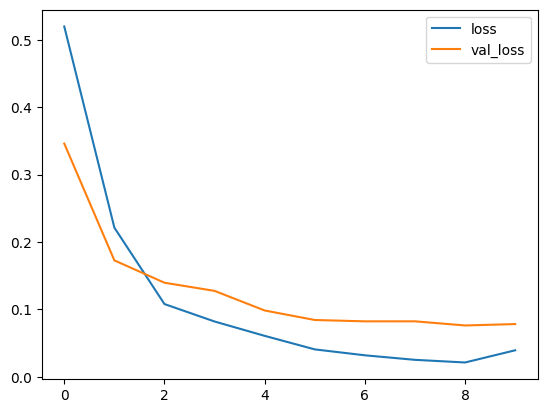

In [23]:
# Plot loss per iteration
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend();

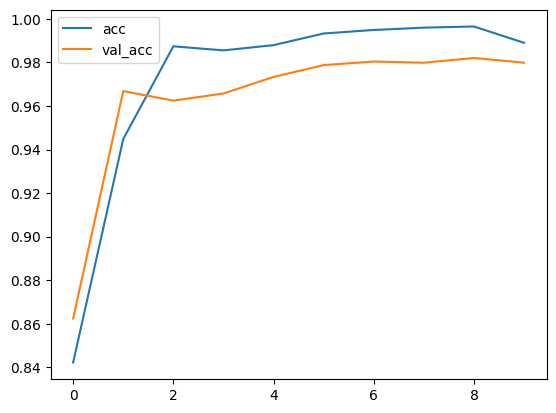

In [25]:
# plot accuracy per iteration
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend();

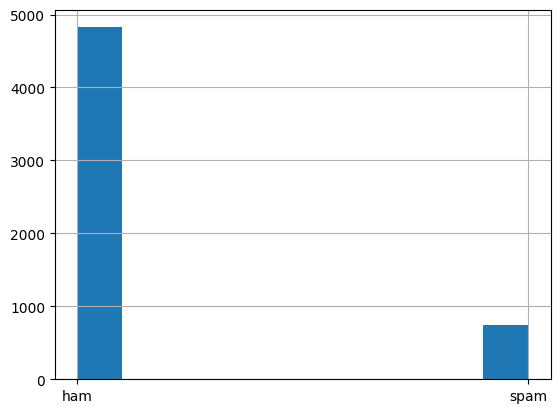

In [27]:
df['label'].hist();

In [28]:
from sklearn.metrics import f1_score
f1_score(Ytrain,model.predict(df_train) > 0.5)

ValueError: Invalid dtype: object

In [29]:
from sklearn.metrics import f1_score

# Convert df_train to a TensorFlow Dataset with string dtype
train_pred_ds = tf.data.Dataset.from_tensor_slices(df_train.values).batch(32)

# Make predictions
predictions = model.predict(train_pred_ds)

# Calculate F1 score
f1_score(Ytrain, predictions > 0.5)

117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


0.9907881269191402

In [30]:
f1_score(Ytest,model.predict(df_test) > 0.5)

ValueError: Invalid dtype: object

In [31]:
from sklearn.metrics import f1_score

# Convert df_test to a TensorFlow Dataset with string dtype
test_pred_ds = tf.data.Dataset.from_tensor_slices(df_test.values).batch(32)

# Make predictions
predictions = model.predict(test_pred_ds)

# Calculate F1 score
f1_score(Ytest, predictions > 0.5)

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


0.9240246406570842

In [32]:
train_ints = vectorization(df_train.values)
test_ints = vectorization(df_test.values)

In [36]:
train_ints.shape

TensorShape([3733, 115])

In [37]:
test_ints.shape

TensorShape([1839, 171])

In [33]:
train_ints[:5]

<tf.Tensor: shape=(5, 115), dtype=int64, numpy=
array([[  26,  116,   41, 6058,   16,   63,    5,   60,  565,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [ 186,   61,  845, 1358,  885,    9,  319, 4960,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,

In [34]:
# create tf datasets
train_ds = tf.data.Dataset.from_tensor_slices((train_ints,Ytrain))
test_ds = tf.data.Dataset.from_tensor_slices((test_ints,Ytest))

In [35]:
# shuffle and batch the dataset
train_ds = train_ds.shuffle(10000).batch(32).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.batch(32).prefetch(tf.data.AUTOTUNE)

In [39]:
# Create the model

# We get to choose embedding dimensionality
D = 20

# Hidden state dimensionality
M = 15

# if string not specified, will get string -> float casting error
i = Input(shape=(None,))
x = Embedding(V,D)(i)
x = LSTM(M,return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1,activation='sigmoid')(x)

model = Model(i,x)

In [40]:
# Compile and fit
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

print('Training model...')
r = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10)

Training model...
Epoch 1/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.8442 - loss: 0.5591 - val_accuracy: 0.8619 - val_loss: 0.3642
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.8686 - loss: 0.3055 - val_accuracy: 0.8619 - val_loss: 0.2105
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9340 - loss: 0.1453 - val_accuracy: 0.9598 - val_loss: 0.1542
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.9887 - loss: 0.0866 - val_accuracy: 0.9581 - val_loss: 0.1256
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.9921 - loss: 0.0615 - val_accuracy: 0.9636 - val_loss: 0.1150
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.9964 - loss: 0.0410 - val_accuracy: 0.9652 - val_loss: 0.1051
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.9978 - loss: 0.0254 - val_accuracy: 0.9674 - val_loss: 0.0989
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9992 - loss:

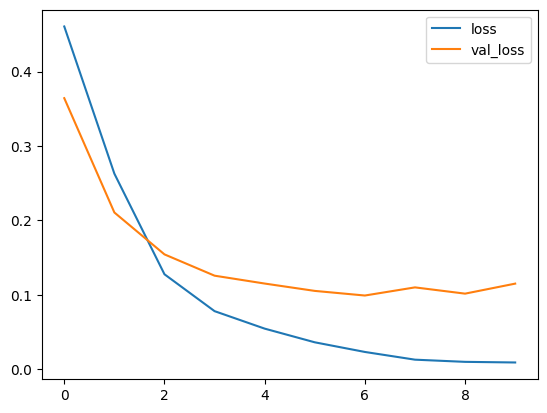

In [41]:
# Plot loss per iteration
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend();

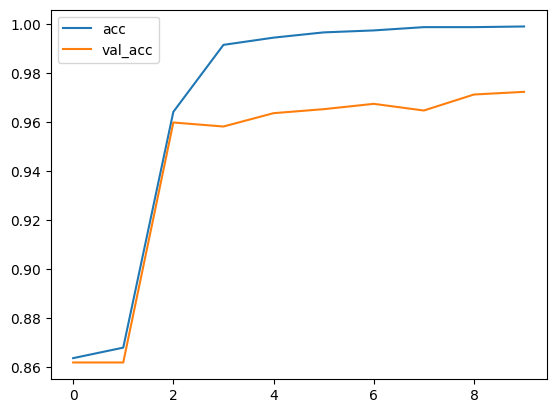

In [42]:
# plot accuracy per iteration
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend();